<div style="border:solid green 2px; padding: 20px">
    
<b>Евгения, привет! Это Александр Матвеевский</b> Я рад тебя видеть на финальном спринте (Проект по А/B-тестированию).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

## Проведение АБ-теста

Цель исследования - оценить корректность проведения А/Б-теста и проанализировать его результаты.

Для анализа используется датасет с действиями пользователя и несколько вспомогательных датасетов (список новых пользователей за определенный период, участники теста, календарь маркетинговых событий.

**Техническое задание:**

* Название теста: *recommender_system_test*;
* Группы: А (контрольная), B (новая платёжная воронка);
* Дата запуска: 2020-12-07;
* Дата остановки набора новых пользователей: 2020-12-21;
* Дата остановки: 2021-01-04;
* Аудитория: 15% новых пользователей из региона EU;
* Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
* Ожидаемое количество участников теста: 6000.
* Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Вступления нету
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Добавила.</div>
    

### Загрузка и изучение данных

In [2]:
import pandas as pd
import numpy as np
import math as mth
from matplotlib import pyplot as plt

import seaborn as sns


import scipy.stats as stats
from scipy import stats as st

from plotly import graph_objects as go
import plotly.io as pio
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Хорошо, модули загружены
</div>

In [3]:
sns.set(rc={'figure.figsize':(15, 8)})
pio.templates.default = "plotly_white"

In [4]:
try:
    events = pd.read_csv('final_ab_events.csv')
    users = pd.read_csv('final_ab_new_users.csv')
    participants = pd.read_csv('final_ab_participants.csv')
    marketing_events = pd.read_csv('ab_project_marketing_events.csv')
except:
    events = pd.read_csv('/datasets/final_ab_events.csv')
    users = pd.read_csv('/datasets/final_ab_new_users.csv')
    participants = pd.read_csv('/datasets/final_ab_participants.csv')
    marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Здорово, что для подгрузки данных используешь конструкцию try-except, она поможет избежать потенциальных ошибок при загрузке данных, связанных, например, с некорректным указанием путей.

Подробнее о конструкции по ссылке:

https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html

Либо же можно использовать стандартную библиотеку os:

https://pythonworld.ru/moduli/modul-os.html

Несколько интересных статей кейсы использования конструкции:

https://www.programiz.com/python-programming/exception-handling

https://towardsdatascience.com/do-not-abuse-try-except-in-python-d9b8ee59e23b

https://www.techbeamers.com/use-try-except-python/

Как вариант в try можно указать корректные пути (в нашем случае глобальные) в except - некорректные (локальные). Можно также специфицровать тип ошибки, FileNotFoundError или задать кастомный тип ошибки (FilePathError, например)

Она полезна, если ты работаешь локально, а потом подгружаешь проект на платформу. Конструкция позволит не падать коду и локально, и на сервере ЯП, так как если не сработает один блок с путями, сработает другой.

Ну и вообще, в целом полезно про эту констуркцию знать, она универсальна и может быть использована в разных задачах.
</div>

In [5]:
display(events.head())
display(users.head())
display(participants.head())
display(marketing_events.head())

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [6]:
display(events.info())
display(users.info())
display(participants.info())
display(marketing_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

    
Отлично! Первый взгляд на данные есть

### Предобработка данных

#### Изменение типов данных

In [7]:
events['event_dt'] = pd.to_datetime(events['event_dt'])

users['first_date'] = pd.to_datetime(users['first_date'])

marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

#### Поиск дубликатов

In [8]:
# Поиск явных дубликатов
print(events.duplicated().sum())
print(users.duplicated().sum())
print(participants.duplicated().sum())
print(marketing_events.duplicated().sum())
print(users['user_id'].duplicated().sum())

0
0
0
0
0


#### Анализ пропущенных значений

In [9]:
# выводим кол-во пропущенных значений
pd.DataFrame(events.isna().sum()).style.background_gradient('coolwarm')

,0
user_id,0
event_dt,0
event_name,0
details,377577


In [10]:
print(events.query('details.notnull()')['event_name'].value_counts())
print(events['details'].count())

purchase    62740
Name: event_name, dtype: int64
62740


Пропущенные значения только в столбце 'details' датафрейма events. Столбец заполнен только для события "покупка" и содержит в себе сумму покупки. Заполнять пропущенные значения не требуется

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Совет на будущее, смотри, не есть хорошо, когда налево и направо пытаться заполнить пропуски. В реальной работе - сейчас заменил на ноль, а через месяц забыл и среднее подсчитал. Плюс могут быть моменты, когда покупка бонусная или подарок, будет ноль стоить. В общем, если можно оставить пропуски пропусками - а тут это можно сделать, то лучше так и сделать, на результаты, даже если мы что-то захотим подсчитать - это не повлияет

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Перед изучением распределения пользователей по группам нужно в начале изучить количество АВ тестов, а затем уже по каждому тесту посмотреть распределение. То, что у нас несколько тестов, можно было отметить выше. Но, вообще хорошая практика -  изучать категориальные данные и делать соответствующие выводы.
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Добавила ниже</div>
    

#### Анализ категориальных переменных

In [11]:
events['event_name'].value_counts()

login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64

In [12]:
users['region'].value_counts()

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

In [13]:
users['device'].value_counts()

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64

In [14]:
participants['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

Всего 4 события. Воронку определяем как login --> product_page --> product_cart --> purchase.

Пользователи находятся в 4-х регионах, большая часть - из Европы. Для захлда на сайт используют 4 устройства, самое популярное - Android

Также в датасете содержится информация об участниках двух тестов. recommender_system_test - наш тест, результаты которого требуется проанализировать.  interface_eu_test - конкурирующий тест.

#### Проверка требований технического задания

Приведем пункты технического задания, на соответствие которых необходима проверка:

* Группы: А (контрольная), B (новая платёжная воронка);
* Дата запуска: 2020-12-07;
* Дата остановки набора новых пользователей: 2020-12-21;
* Дата остановки: 2021-01-04;
* Аудитория: 15% новых пользователей из региона EU;
* Ожидаемое количество участников теста: 6000;
* Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%.

1. Проверим, что в тесте recommender_system_test нет пользователей, которые попали одновременно в 2 группы.

In [15]:
# Фильтруем данные по нужному тесту
test_check = participants.query('ab_test == "recommender_system_test"')

# Преобразуем таблицу, в которой будет видно, сколько раз пользователь появлялся в каждой группе
test_check = test_check.pivot_table(index='user_id', columns='group', values='ab_test', aggfunc='count').reset_index()

# Считаем число пользователей в тесте
print('Всего участников теста:', test_check['user_id'].nunique())

# Фильтруем по пользователям, которые находились в обеих группах
test_check.query('A >=1 & B >=1')

Всего участников теста: 6701


group,user_id,A,B


В датасете participants информация о 6 701 участнике, пересечения между группами А и Б не обнаружено

2. По условию набор пользователей происходил с 7 по 21 декабря 2020. Проверим, что все пользователи были набраны в этот промежуток

In [16]:
test_check = participants.query('ab_test == "recommender_system_test"').merge(users, on='user_id')

print('Минимальное первое действие пользователя:', test_check['first_date'].min())
print('максимальное первое действие пользователя', test_check['first_date'].max())

Минимальное первое действие пользователя: 2020-12-07 00:00:00
максимальное первое действие пользователя 2020-12-21 00:00:00


Условие выполняется.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Выше ты смотришь на все логи, они могут хоть за 10 лет быть. Проверять на ТЗ мы должны только данные, которые относятся к нашему тесту.. В данном случае, у тебя получается, что набор новых пользователей был осуществлён 23 числа и мы можем грешить на инженеров. Но давай посмотрим именно дату остановки набора именно нашего теста? Для этого объединим таблицы participants с нужным тестом и new_users. И посмотрим на окончание теста? Соответствует ли оно заданию?
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Действительно, условие теперь выполняется. Спасибо, в дальнейшем буду внимательнее</div>
    

3. Следующее условие - Аудитория: 15% новых пользователей из региона EU;

Получим число пользователей из EU, участвующих в тесте

In [17]:
# Фильтрем только необходимый тест
eu_in_test = participants.query('ab_test == "recommender_system_test"')

# Присоединяем датасет users, чтобы получило информацию о регионах
eu_in_test = eu_in_test.merge(users)


eu_in_test = eu_in_test.groupby('region').agg({'user_id': 'nunique'})

eu_in_test

,user_id
region,
APAC,72
CIS,55
EU,6351
N.America,223


Найдем число пользователей из EU среди всех новых пользователей

In [18]:
eu_in_users = users.groupby('region').agg({'user_id': 'nunique'})

eu_in_users

,user_id
region,
APAC,3153
CIS,3155
EU,46270
N.America,9155


In [19]:
print('Доля EU пользователей в тесте от числа новых EU пользователей',\
      eu_in_test['user_id']['EU']/eu_in_users['user_id']['EU'])

Доля EU пользователей в тесте от числа новых EU пользователей 0.13725956343202939


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Ты верно посчитала этот пункт
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Так как чуть выше я изменила расчеты и не удаляла из датасета с пользователями юзеров после 21 декабря, расчет немного изменился.</div>
    

Условие не выполняется, но рассчитанный результат близок к требуемому значению

4. Проверим сроки выполнения теста

In [20]:
print('Самое раннее событие:', events['event_dt'].min())
print('Последнее событие', events['event_dt'].max())

Самое раннее событие: 2020-12-07 00:00:33
Последнее событие 2020-12-30 23:36:33


По условиям, тест проходил с 7 декабря 2020 по 4 января 2021, однако в датасете events последнее событие - 30 декабря 2020. Это говорит о том, что тест был завершен раньше, либо выгрузили не все данные.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Да, тест остановлен на 5 дней раньше
</div>

5. Проверим количество участников в тесте

In [21]:
data = participants.groupby(['ab_test', 'group'], as_index=False).agg({'user_id': 'nunique'})
data['total'] = data.groupby('ab_test')['user_id'].transform('sum')

data

,ab_test,group,user_id,total
0,interface_eu_test,A,5831,11567
1,interface_eu_test,B,5736,11567
2,recommender_system_test,A,3824,6701
3,recommender_system_test,B,2877,6701


В тесте recommender_system_test 6701 участник, немного больше, чем по условию (6000)

#### Проверка на пересечение теста с другими активностями

In [22]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Отфильтруем датасет по датам проведения теста, чтобы понять, пересекается ли аб-тест с какими-то событиями

In [23]:
# '2020-12-21 00:00:00']

marketing_events.query('start_dt >= "2020-12-07 00:00:00" & finish_dt <= "2021-01-04 00:00:00"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


Есть пересечение с одним ивентом. После составления профиля пользователей проверим как события влияют на действия пользователей. Если критично - удалим события в эти даты

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

События, праздники и тп - влияют на две группы одинаково. Это просто изменение качества пользователей, но относительную конверсию группы В к группе А - не будет иметь воздействие. Но это нужно учитывать при изучении абсолютных данных.
</div>

6. В ТЗ содержится пункт - ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%. Это значит, что нам требуется рассчитать лайфтайм событий и отбросить события старше 14 дней.

In [24]:
# Соединяем таблицы с датой события и регистрацией пользователя
df = events.merge(users, on='user_id')

# Отбираем нужные события
df = df[(df['event_dt'] - df['first_date']).dt.days <= 14]

df

,user_id,event_dt,event_name,details,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone
1,E1BDDCE0DAFA2679,2020-12-09 06:21:35,purchase,9.99,2020-12-07,N.America,iPhone
3,E1BDDCE0DAFA2679,2020-12-07 20:22:03,login,NaN,2020-12-07,N.America,iPhone
4,E1BDDCE0DAFA2679,2020-12-09 06:21:35,login,NaN,2020-12-07,N.America,iPhone
6,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone
...,...,...,...,...,...,...,...
440310,C9F1399FDCD83F13,2020-12-23 15:04:28,login,NaN,2020-12-23,EU,iPhone
440311,C9F1399FDCD83F13,2020-12-24 04:47:08,login,NaN,2020-12-23,EU,iPhone
440312,C9F1399FDCD83F13,2020-12-25 21:25:24,login,NaN,2020-12-23,EU,iPhone
440313,C9F1399FDCD83F13,2020-12-27 09:47:46,login,NaN,2020-12-23,EU,iPhone


#### Проверка на пересечение с конкурирующим тестом

Проверим, встречаются ли пользователях в двух тестах сразу? Фильтровать будем именно по группе Б, так как группа А - контрольная и соседний тест на нее не влияет

In [25]:
# Добавляем колонку с номером строки для подсчета результатов
data = participants.reset_index()

data = data.pivot_table(index='user_id', columns=['ab_test', 'group'], values='index', aggfunc='count').reset_index()

# Переименование колонок для удобства
data.columns = [
    'user_id',
    'interface_eu_test_a',
    'interface_eu_test_b',
    'recommender_system_test_a',
    'recommender_system_test_b'
]

# Фильтруем пользователей, которые встречаются в группе Б в обоих тестах
data = data.query('interface_eu_test_b >=1 & recommender_system_test_b >=1')
data

,user_id,interface_eu_test_a,interface_eu_test_b,recommender_system_test_a,recommender_system_test_b
2,001064FEAAB631A1,NaN,1.0,NaN,1.0
55,010DB4614355A4BB,NaN,1.0,NaN,1.0
115,020A95B66F363AFB,NaN,1.0,NaN,1.0
130,022A97E4F285BD73,NaN,1.0,NaN,1.0
165,02A553C0C9716E82,NaN,1.0,NaN,1.0
...,...,...,...,...,...
16428,FC37CBE8211E02A8,NaN,1.0,NaN,1.0
16490,FD2E811B409ADB85,NaN,1.0,NaN,1.0
16638,FF7BE2897FC0380D,NaN,1.0,NaN,1.0
16644,FF9A81323FA67D6E,NaN,1.0,NaN,1.0


344 пользователя участвуют в обоих тестах. Занесем идентификаторы этих пользователей в список, чтобы потом узнать, влияют ли они на результаты теста.

In [26]:
users_in_both_test = data['user_id'].to_list()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__
    
Верное наблюдение.    
    
В данной ситуации, наиболее корректным решением будет проверить в какие именно группы теста interface_eu_test попали пользователи теста recommender_system_test. Ведь если они попали только в контрольную группу - это значит, что тест interface_eu_test никак на них не повлиял
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Правильно ли я поняла, что необходимо отследить только тех юзеров, которые в обоих тестах попали в группу Б?
Я переделала расчет</div>
    

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Евгения, также имеется несколько моментов, на которые стоит обратить внимание на этапе оценки корректности сбора данных:
    
    
1. Отсутствует проверка на пересечение пользоваталей внутри теста
    
    
2. По ТЗ дата остановки набора новых пользователей: 2020-12-21. Нам следует отфильтровать события с лайфтаймом больше, чем горизонт событий. (т.е. удалить строки, в которых события больше 14 дней)    
    
3. Вывод по разделу. Тут важно описать качество исходных данных
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    п.1 Выполнено
    п.2 Выполнено
    п.3 Выполнено ниже
</div>
    

**Вывод:**

По время предобработки данных дубликаты не обнаружены. Пропущенные значения, требующие заполнения и влияющие на результаты теста, также не были найдены.

При проверке данных на соответсвие ТЗ были выявлены технические ошибки,а именно:
* Данные по проведению АБ-теста предоставлены за промежуток с 7 декабря по 30 декабря 2020 года, хотя в ТЗ заявлено, что проведение теста было запланировано с 7 декабря 2020 по 4 января 2021 года. Не хватает данных за 5 дней. Это может означать, что тест остановлен слишком рано либо были выгружены не все данные.

* Тест recommender_system_test проводился параллельно с конкурирующим тестом interface_eu_test. Много пользователей стало участниками обоих тестов, в том числе обнаружны пользователи, которые в обоих тестах попали в группу Б (тестовую), что может влиять на их действия.

* Проведение теста пересекается с маркетинговым событием Christmas&New Year Promo в течение 5 дней, что так же может давать серьезные при изучении абсолютных данных

Все эти недочеты могут серьезно повлиять на результаты АБ-тестирования


### Исследовательский анализ данных

#### Профили участников тестов

Созданим общую таблицу по всем участникам тестов. Так как ранее мы отфильтровали события по лайфтайму и сохранили в переменную df, соединять с датасетом participants будем именно ее.

In [27]:
test_users = participants.merge(df, on='user_id')

test_users

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,EU,PC
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,EU,iPhone
...,...,...,...,...,...,...,...,...,...
103149,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,NaN,2020-12-20,EU,Android
103150,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,NaN,2020-12-14,EU,PC
103151,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,NaN,2020-12-14,EU,PC
103152,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,NaN,2020-12-14,EU,PC


#### Количество событий на пользователя

In [28]:
data = test_users.groupby(['ab_test', 'group']).agg({'user_id':'nunique', 'event_name': 'count'})
data['avg_event'] = data['event_name'] / data['user_id']

data

user_id  event_name  avg_event
ab_test                 group                                
interface_eu_test       A         5466       40122   7.340285
                        B         5382       38962   7.239316
recommender_system_test A         2747       18947   6.897343
                        B          928        5123   5.520474

В среднем на одного пользователя приходится 7 событий, кроме группы B в recommender_system_test. Так же стоит обратить внимание, что участников в этой группе намного меньше, чем в соседней, что может повлиять на результаты теста.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №2__


Неплохо бы визуализировать количество событий на пользователя по группам. В идеале можно провести ещё стат тест.
</div>

#### Распределение число событий по времени

Рассмотрим, как распределены события во времени у участников recommender_system_test

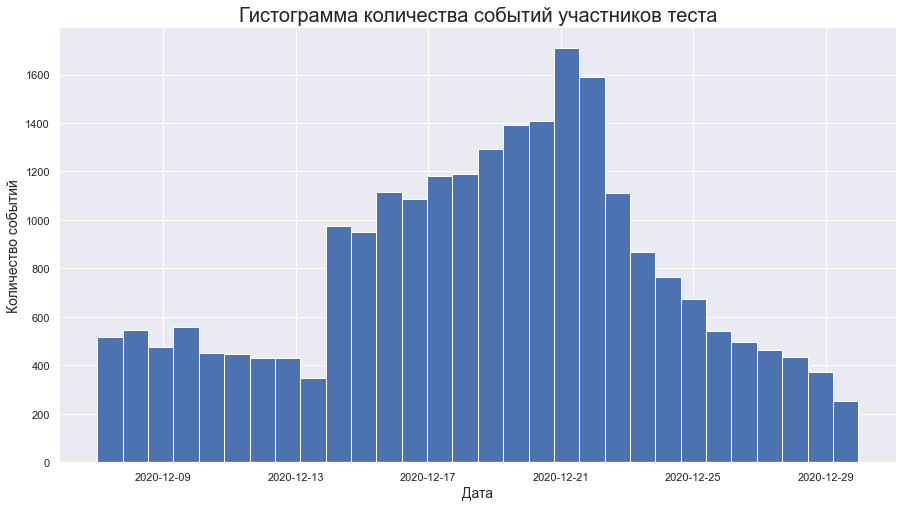

In [29]:
recommender_system_test = test_users.query('ab_test == "recommender_system_test"')

recommender_system_test['event_dt'].hist(bins=30, figsize=(15,8))

plt.title('Гистограмма количества событий участников теста', fontsize=20)
plt.ylabel('Количество событий', fontsize=14)
plt.xlabel('Дата', fontsize=14)
# plt.xticks(rotation=45)
plt.show();

Cпустя неделю проведения теста число событий увеличивается в 2 раза. В период второй недели с 14 по 21 декабря число событий стабильно растет, а затем резко начинает падать и достигает уровня недельной давности.

Похоже, что спустя неделю после старта теста что-то произошло, из-за чего появился резкий скачек, однако, смотреть на предварительные результаты в первую неделю теста не стоит, так как группы эксперимента малы, и каждый новый пользователь сильно меняет картину. Как раз спустя неделю начался хороший рост активности, а потом спустя еще неделю пошел на спад, вероятно, у этого есть причины. с 25 декабря начался один из ивентов, возможно это повлияло на действия пользователей.

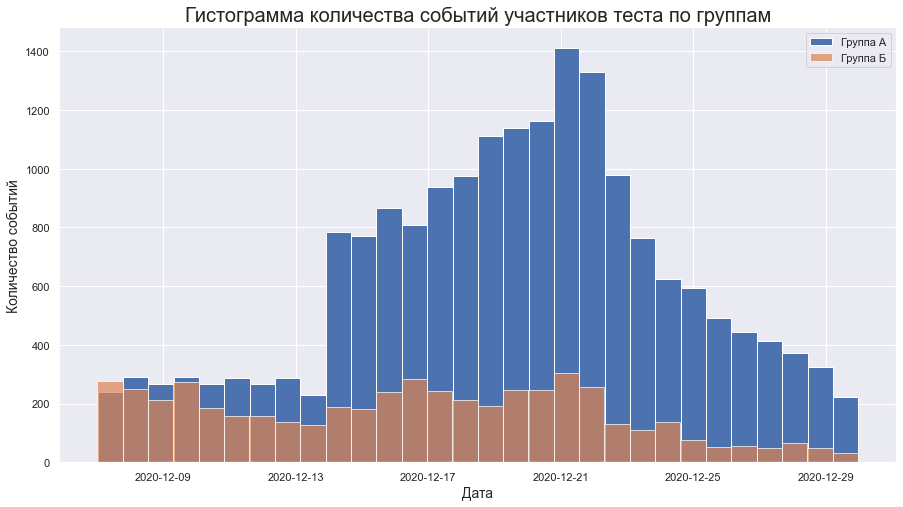

In [30]:
hist_1 = recommender_system_test.query('group == "A"')['event_dt']
hist_2 = recommender_system_test.query('group == "B"')['event_dt']

plt.figure(figsize=(15, 8))

plt.hist(hist_1, bins=30, alpha=1, label='Группа А')
plt.hist(hist_2, bins=30, alpha=0.7, label='Группа Б')
plt.legend(loc='upper right')
plt.title('Гистограмма количества событий участников теста по группам', fontsize=20)
plt.ylabel('Количество событий', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.show();

Распределение событий у двух групп резко отличается. У группы Б события распределены стабильнее, чем у группы А.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

С чем может быть связан скачек событий в группе А с 14 числа? (можно рассмотреть динамику набора пользоваталей)
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

График по данным построен корректно, но не оформлен до конца. Суть в том, что график должен быть наглядным без контекста (т.к. в реальной практике ты будешь показывать презентации или отчет сторонним людям). 

Тебе необходимо проследить чтобы всегда был заголовок и подписаны оси. Доработай этот момент пожалуйста.
    
Данное замечания относится ко всему проекту и перепроверь его самостоятельно. Далее не буду акцентировать на этом внимание
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Добавила. И как я сама не додумалась >.< </div>
    

Рассмотрим динамику набора пользователей в тест

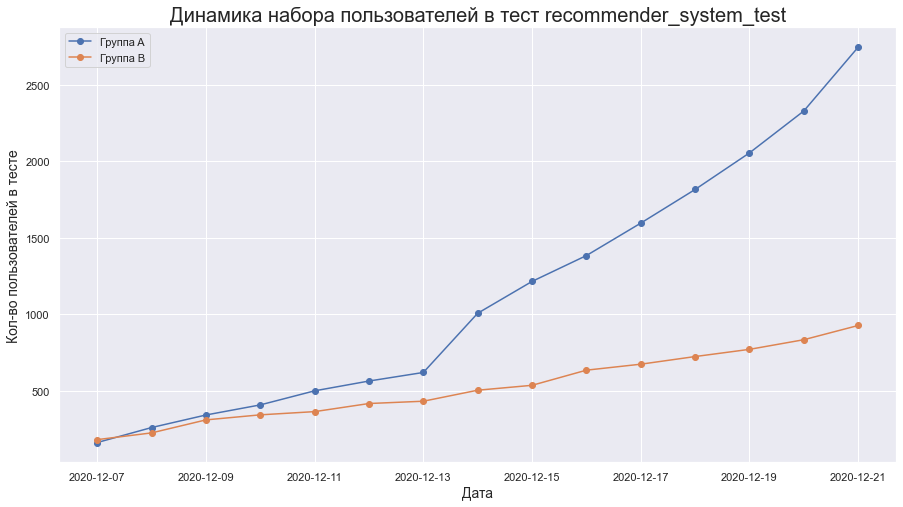

In [31]:
cumulative_users = recommender_system_test.groupby(['first_date', 'group'], as_index=False).agg({'user_id': 'nunique'})

cumulative_users['cumulative_sum'] = cumulative_users.groupby('group')['user_id'].cumsum()

cumulative_users


# датафрейм с кумулятивным количеством пользователей в группе А
cumulative_users_a = cumulative_users.query('group == "A"')

# датафрейм с кумулятивным количеством пользователей в группе B
cumulative_users_b = cumulative_users.query('group == "B"')

plt.figure(figsize=(15, 8))

# Строим график группы А
plt.plot(cumulative_users_a['first_date'], cumulative_users_a['cumulative_sum'], label='Группа A', marker='o')

# Строим график группы B
plt.plot(cumulative_users_b['first_date'], cumulative_users_b['cumulative_sum'], label='Группа B', marker='o')


plt.legend() 
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кол-во пользователей в тесте', fontsize=14)
plt.title('Динамика набора пользователей в тест recommender_system_test', fontsize=20);

In [32]:
cumulative_users

,first_date,group,user_id,cumulative_sum
0,2020-12-07,A,163,163
1,2020-12-07,B,182,182
2,2020-12-08,A,98,261
3,2020-12-08,B,44,226
4,2020-12-09,A,82,343
5,2020-12-09,B,85,311
6,2020-12-10,A,66,409
7,2020-12-10,B,33,344
8,2020-12-11,A,92,501
9,2020-12-11,B,21,365


С 14 декабря количество пользователей в группе А резко стало нарастать, этим обоснован рост числа событий. В группу Б набор пользователей происходил равномернее

#### Воронка конверсии

In [29]:
def steps(row):
    if row['event_name'] == 'login':
        return 1
    elif row['event_name'] == 'product_page':
        return 2
    elif row['event_name'] == 'product_cart':
        return 3
    else:
        return 4

In [105]:
logs_funnel = recommender_system_test.groupby(['group', 'event_name'],as_index=False)\
.agg({'user_id': 'nunique'})

# вводим новый столбецс нумерацией событий
logs_funnel['step'] = logs_funnel.apply(steps, axis=1)

# Фильтруем но столбцу step для корректного отображения воронки
logs_funnel = logs_funnel.sort_values(by='step')

logs_funnel_A = logs_funnel.query('group == "A"')
logs_funnel_B = logs_funnel.query('group == "B"')


# Строим график
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = ' Группа A',
    y = logs_funnel_A['event_name'],
    x = logs_funnel_A['user_id'],
    textinfo = "value + percent previous"))

fig.add_trace(go.Funnel(
    name = 'Группа B',
    orientation = "h",
    y = logs_funnel_B['event_name'],
    x = logs_funnel_B['user_id'],
    textposition = "inside",
    textinfo = "value + percent previous"))


fig.update_layout(title_text='Воронка конверсии пользователей по группам')
fig.show()

Больше всего пользователей теряется на шаге перехода со страницы продукта в корзину товаров - меньше половины пользователей доходят до корзины. В тоже время на шаге перехода из корзины к оплате у обеих групп число пользователей прибавляется. Вероятно, у пользователей есть возможность сразу купить товар, не переходя в корзину.

Стоит обратить внимание и изучить вопрос, почему после просмотра страницы товара большинство пользователей теряются и в итоге не совершают покупку.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Здорово, что используешь такой инструмент как Funnel. Но были упущены некоторые нюансы:

* Воронка строится по количеству уникальных пользователей, а не по количеству событий.  Исследование воронки позволяет визуализировать шаги пользователей на пути к выполнению целевого действия, насколько успешно клиенты проходят каждый из этапов (у нас всего ты вывела ранее в группе А 2700 пользоваталей, а тут 8.5к)
    
* Воронка должна завершаться целевым действием оплата. Тебе надо самостоятельно задать очередность этапов. Это можно реализовать с помощью `reindex()` - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html
    
* Обрати, пожалуйста, внимание, что воронка должна заканчиваться целевым действием (оплата), но на графике - последнее событие продуктовая карта, т.е. основная цель пользователя - просмотр продуктовой корзины, что является не совсем корректно. Тут стоит поменять местами
    
* Заголовок воронки
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Со значениями воронки действительно косяк, исправила. По поводу шагов - у меня все отображается верно. Я реализовала не через reindex (хотя полезно знать на будущее, спасибо), а более извращенным способом - создала отдельный столбец с нумерацией событий и отфильтровала по нему. У меня дейсвительно получается кривоватая воронка - событий с корзиной немного меньше, чем событий с оплатой. Я в комментариях предположила, почему так проиходит.</div>
    

#### Особенности данных для АБ-тестирования

Критерии успешного A/B-теста:

1. Достаточное количество пользователей.

2. Выдерживать запланированную длительность теста. Рекомендованная длительность - не менее 2 недель. Также нет смысла сильно затягивать тест

3. Желательно, чтобы проведение теста не пересекалось с проведением других тестов (особенно конкурирующего)

4. Корректное деление трафика

6. Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости

7. Отсутвие пересечение пользователей в группах.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Равный размер групп дает оптимальную длительность теста, но, вообще, группы просто должны быть достаточно большими и не обязательно равными.
    
---
    
Вот здесь подробно расписано, что не все так страшно в несбалансированных выборках
    
https://medium.com/statistics-experiments/%D0%B4%D0%B8%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81-%D0%B2-a-b-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-%D0%B5%D1%81%D1%82%D1%8C-%D0%BB%D0%B8-%D1%80%D0%B0%D0%B7%D0%BD%D0%B8%D1%86%D0%B0-%D0%BC%D0%B5%D0%B6%D0%B4%D1%83-99-1-%D0%B8-50-50-%D0%B2-%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%85-11c8f4fe7eb4
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Эх, а в практикуме такого не было :) Учту, спасибо</div>
    

### А/Б-тестирование

#### Выводы по используемым данным

При сборе данных для теста, были найдены следующие ошибки:


* Данные по проведению АБ-теста предоставлены за промежуток с 7 декабря по 30 декабря 2020 года, хотя в ТЗ заявлено, что проведение теста было запланировано с 7 декабря 2020 по 4 января 2021 года. Не хватает данных за 5 дней. Это может означать, что тест остановлен слишком рано либо были выгружены не все данные

* Тест recommender_system_test проводился параллельно с конкурирующим тестом interface_eu_test. Много пользователей стало участниками обоих тестов

* Контрольная группа А почти в 3 раза больше тестовой группы B, что может давать серьезные искажения результатов. Это может быть связано с ошибками, допущенными при формировании групп и наборе участников для проведения теста

* Проведение теста пересекается с маркетинговым событием Christmas&New Year Promo в течение 5 дней, что так же может давать серьезные искажения. В случае исключения временного периода этого пересечения теряются данные за 5 дней

В целом проведение теста можно назвать **неудовлетворительным**, так как нарушены ключевые кретерии проведения А/Б-тестирования и результаты дают искажение

#### Проведение А/Б-теста

Для проверки гипотез воспользуемся Z-критерием. Так как мы проводим множественное сравнение, применим метод Бонферрони (поправка Бонферрони). В нашем случае мы будем проводить 4 теста, следовательно, bonferroni_alpha будет равно alpha / 4.

Нулевая гипотеза: Разница между долями участвующих в событии пользователей в группах статистически незначима.

Альтернативная гипотеза: Разница между долями участвующих в событии пользователей в группах статистически значима.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпретация нулевой и альтернативной гипотез
</div>

In [111]:
# Задаем уровень статистической значимости

alpha = 0.05
bonferroni_alpha = alpha / 4

In [115]:
# Функция для расчета статистической значимости
def z_test(group_a, group_b, event, alpha):
    event_users = np.array([test_event.loc[event, group_a],
                           test_event.loc[event, group_b]])
    total_users = np.array([test_users.loc[group_a, 'user_id'],
                           test_users.loc[group_b, 'user_id']])
    
    # Пропорция в первой группе
    p1 = event_users[0]/total_users[0]
    
    # Пропорция в первой группе
    p2 = event_users[1]/total_users[1]
    
#     print(event_users[0], event_users[1], total_users[0], total_users[1])
    
    # Пропорция в комбинированном датасете
    p_combined = (event_users[0] + event_users[1]) / (total_users[0] + total_users[1])
    
    # разница пропорций в датасетах
    difference = p1 - p2
    
    # стандартная для критерия со стандартным нормальным распределением
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / total_users[0] + 1 / total_users[1])
    )
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)    
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    

    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.6f}'\
          .format(group_a, group_b, event, p_value=p_value))
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [110]:
# Подготовка данных для анализа

test_users = recommender_system_test.groupby('group').agg({'user_id': 'nunique'})

display(test_users)


test_event = recommender_system_test.pivot_table(index='event_name', columns='group',values='user_id',aggfunc='nunique')\


display(test_event)

,user_id
group,
A,2747
B,928


group,A,B
event_name,,
login,2747,927
product_cart,824,255
product_page,1780,523
purchase,872,256


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Мы рассматриваем проверки в рамках одного датасета. При каждой проверке какой-либо выборки из данных, мы увеличиваем вероятность получить ошибку.   
  
К тому же, события в воронке зависимы друг от друга, иначе это не было бы воронкой. У тебя несколько проверок на каждый этап воронки.
  
Соответственно у нас получаются сравнения внутри группы и между групп = 1*4 = 4 события. Именно на столько и нужно сделать корректировку. А ты делишь на 8
    

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Тут я решила поступить следующим образом: вначале провести стат тест с текущими данными,а потом отфильтровать аномалии (пересекающиеся пользователи, даты, совпадающие с ивентом и так далее) и провести тест еще раз. Отсюда и бралось деление на 8. Есть ли в этом смысл? Я весь код закомментирую пока. </div>
    

In [116]:
for event in test_event.index:
    z_test('A', 'B', event, bonferroni_alpha)
    print()

Проверка для групп A и B, событие: login, p-значение: 0.085299
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка для групп A и B, событие: product_cart, p-значение: 0.145348
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Проверка для групп A и B, событие: product_page, p-значение: 0.000004
Отвергаем нулевую гипотезу: между долями есть значимая разница

Проверка для групп A и B, событие: purchase, p-значение: 0.017592
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



При проведении статистических тестов только в одном тесте отвергнуть нулевую гипотезу - при просмотре страницы товара. Это означает, что во всех остальных событиях нет основания считать, что конверсия изменилась.

<div class="alert alert-info"> <b>Комментарии студента:
    </b> Вот отсюда я проводила второй тест.</div>
    

Попробуем очистить данные и провести тест заново, а именно:
* Убрать все события, пересекающиеся и ивентом (с 25 декабря 2020)
* Убрать всех пользователей, которые одновременно учавствовали во втором тесте

In [121]:
# # Фильтруем данные
# recommender_system_test_filtered = recommender_system_test.query('event_dt < "2020-12-25 00:00:00" & user_id not in @users_in_both_test')

# # Подготовка данных для анализа
# test_users = recommender_system_test_filtered.groupby('group').agg({'user_id': 'nunique'})
# test_event = recommender_system_test_filtered.pivot_table(index='event_name', columns='group',values='user_id',aggfunc='nunique')\

# for event in test_event.index:
#     z_test('A', 'B', event, bonferroni_alpha)
#     print()

Даже после очистки данных результаты теста не изменились.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

А что это?
</div>

### Выводы и рекомендации

Проведение теста  **неудовлетворительны**, они не могут быть взяты в работу, так как нарушены ключевые критерии проведения АБ-тестирования и результаты дают искажение. А именно:

* Данные по проведению АБ-теста предоставлены за промежуток с 7 декабря по 30 декабря 2020 года, хотя в ТЗ заявлено, что проведение теста было запланировано с 7 декабря 2020 по 4 января 2021 года. Не хватает данных за 5 дней. Это может означать, что тест остановлен слишком рано либо были выгружены не все данные

* Тест recommender_system_test проводился параллельно с конкурирующим тестом interface_eu_test. Много пользователей стало участниками обоих тестов, в том числе попали в тестовые группы (Б) обоих тестов

* Контрольная группа А почти в 3 раза больше тестовой группы B, что может давать серьезные искажения результатов. Это может быть связано с ошибками, допущенными при формировании групп и наборе участников для проведения теста

* Проведение теста пересекается с маркетинговым событием Christmas&New Year Promo в течение 5 дней, что так же может давать серьезные искажения. В случае исключения временного периода этого пересечения теряются данные за 5 дней

**Рекомендации:**

* Проверить условия проведения теста на наличие технических проблем и сбоев, чтобы не допустить сбор данных с ошибками в дальнейшем
* По возможности не проводить конкурирующие тесты одновременно
* При проведение А/Б-тестов учесть периоды маркетинговых событий

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но самое главное - даны рекомендации по проведению АВ-теста. Это важное качество для аналитика. Развивай его и дальше
    
---
    
Не забудь, пожалуйста, подкорретировать вывод после правок

</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Даты

2) Пересеченные пользователи внутри теста

3) Оформление графиков

4) Lifetime событий

5) Количества событий по дням в каждой группе

6) Воронка

7) Поправка Бонферрони

8) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>